In [163]:
#Read in trajectory file
import numpy as np
import matplotlib.pyplot as plt
import json

servoIndices = {
    "NeckTilt": 0,
    "NeckPan": 1,
    "LeftEye": 2,
    "RightEye": 3,
    "LeftPupil": 4,
    "RightPupil": 5,
    "LeftArmJoint1": 6,
    "LeftArmJoint2": 7,
    "LeftArmJoint3": 8,
    "LeftArmJoint4": 9,
    "LeftArmJoint5": 10,
    "LeftHand": 11,
    "RightArmJoint1": 12,
    "RightArmJoint2": 13,
    "RightArmJoint3": 14,
    "RightArmJoint4": 15,
    "RightArmJoint5": 16,
    "RightHand": 17,
    "Body": 18
}

def read_traj_json(file):
    with open(file) as f:
        data = json.load(f)
    trajectories = {traj['UniqueID']: parse_traj(traj['Trajectory']) for traj in data['Trajectories']}
    return trajectories

def parse_traj(traj):
    return np.array(traj)

def plot_one_servo_traj(trajectories, metrics, servo, plots_per_row=3):
    traj_ids = list(trajectories.keys())
    n_row = (len(traj_ids) + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed
    
    fig, axs = plt.subplots(n_row, plots_per_row, figsize=(n_row, plots_per_row * 2))
    
    axs = axs.flatten()  # Flatten the array of axes for easy iteration
    fig.suptitle(f'{servo} Trajectories')
    fig.tight_layout(rect=[0, 0, 1, 0.95])
  
    for i, traj_id in enumerate(traj_ids):
        traj = trajectories[traj_id]
        axs[i].plot(traj[:, servoIndices[servo]])
        axs[i].plot(0, metrics[traj_id]['StartingPosition'][servoIndices[servo]], 'ro', label='Starting Position')
        axs[i].plot(len(traj), metrics[traj_id]['GoalPosition'][servoIndices[servo]], 'go', label='Goal Position')
        axs[i].legend()
        axs[i].set_title(f'Trajectory: {traj_id}')
        

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()
    plt.show()

## read in metrics from CurrentPositionMapping.json as dictionary
def mapping_metrics_to_dic(file_path):
    # Read the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Create a dictionary to store the results
    result = {}
    
    # Iterate through each mapping in the JSON data
    for mapping in data['Mapping']:
        # Extract the UniqueID (assuming it's always a list with one element)
        unique_id = mapping['UniqueID'][0]
        
        # Create a dictionary for this mapping, excluding the UniqueID
        mapping_dict = {key: value for key, value in mapping.items() if key != 'UniqueID'}
        
        # Add this mapping to the result dictionary, using the UniqueID as the key
        result[unique_id] = mapping_dict
    
    return result



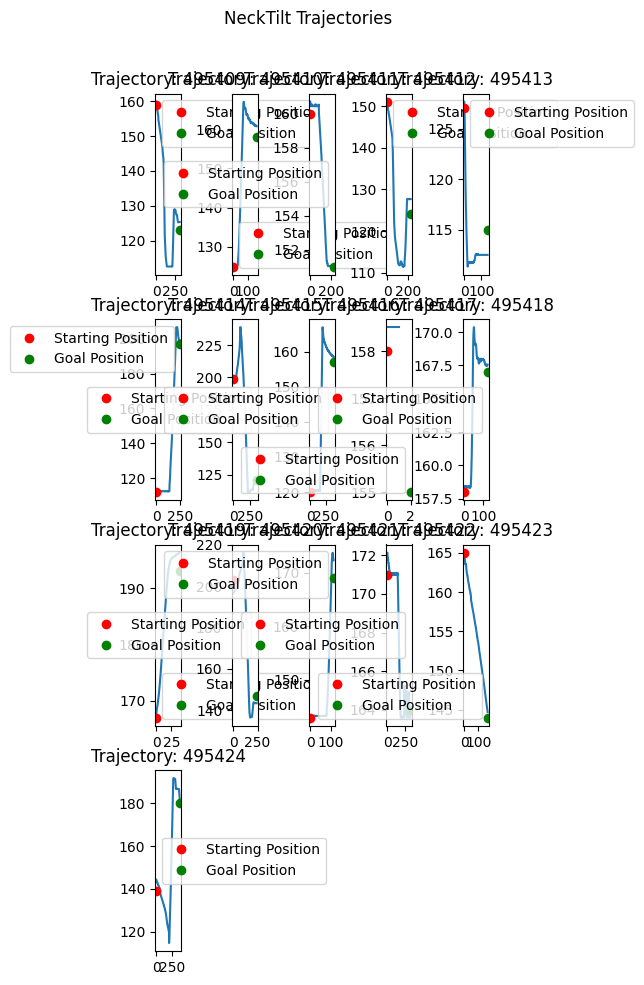

In [164]:
# Read in trajectory json file
trajectories = read_traj_json('TrajectoriesTorso.json')
mapping_metrics = mapping_metrics_to_dic('CurrentPositionMappingTorso.json')
# Plot the trajectory
trajecotry_ids = list(trajectories.keys())

plot_one_servo_traj(trajectories, mapping_metrics, 'NeckTilt', 5)

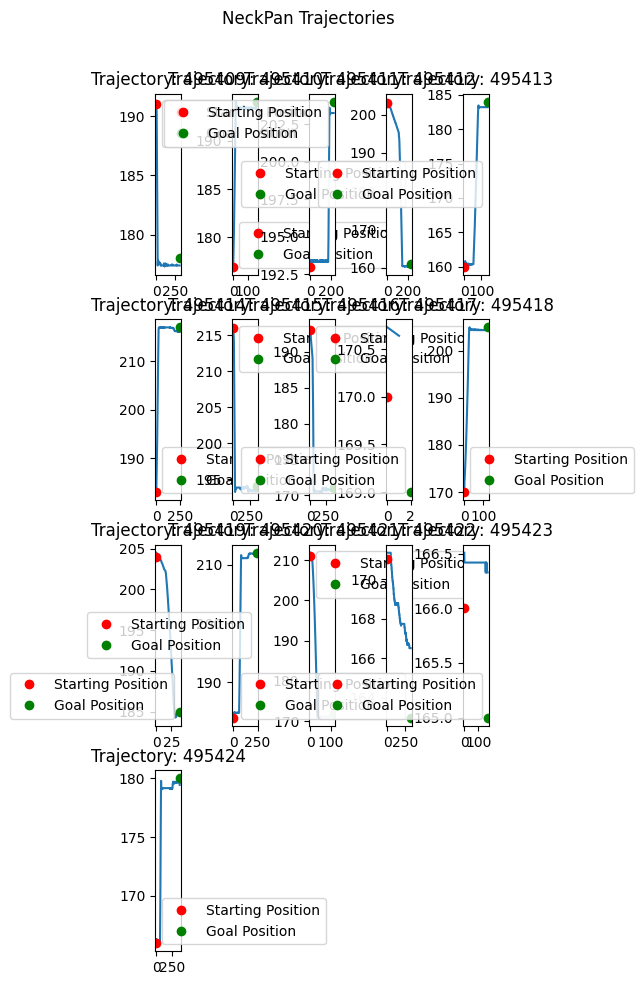

In [165]:
plot_one_servo_traj(trajectories, mapping_metrics, 'NeckPan', 5)